# Gaussian Tensor Train model for 2D toy data

In [2]:
import sys
sys.path.append('../')
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp

tfd = tfp.distributions
tfm = tf.math

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Import Toy data

In [3]:
import data as d
data_names = d.get_toy_names()
print(data_names)

['8gaussians', 'swissroll', 'circles', 'rings', 'moons', 'pinwheel', '2spirals', 'checkerboard', 'line', 'cos']


In [4]:
N = 10000
name = 'checkerboard'
data = d.get_ffjord_data(name, batch_size=N)

# Split into batches
batch_size = 100
dataset = d.to_tf_dataset(data, batch_size=batch_size)

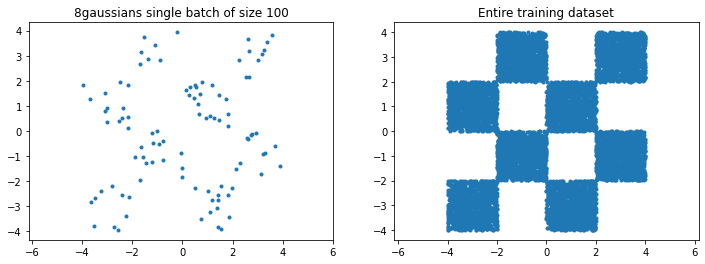

In [5]:
# Visualize dataset
single_batch = list(dataset)[0]
f, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(single_batch[:, 0], single_batch[:, 1], '.')
ax[0].axis('equal')
ax[0].set_title(f'8gaussians single batch of size {batch_size}')
ax[1].plot(data[:, 0], data[:, 1], '.')
ax[1].axis('equal')
ax[1].set_title(f'Entire training dataset')
plt.show()

## Fit model to data

In [6]:
import models as m
K = 8 # Number of components
M = 2 # Dimension of data
model = m.TensorTrainGaussian(K, M, seed=2)

In [7]:
EPOCHS = 1000
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

In [8]:
from tqdm import tqdm
import time

losses = []
start_time = time.time()
for epoch in tqdm(range(EPOCHS),desc='Training TT'):    
    loss = 0
    for i,x in enumerate(dataset):
        loss += model.train_step(x,optimizer) 
    losses.append(loss.numpy()/len(dataset))
        
end_time = time.time()
print(f'\nTraining time elapsed: {int(end_time-start_time)} seconds')
print(f'Final loss: {losses[-1]}')

Training TT: 100%|██████████| 1000/1000 [02:30<00:00,  6.67it/s]
Training time elapsed: 150 seconds
Final loss: 3.5179193115234373



## Visualize results

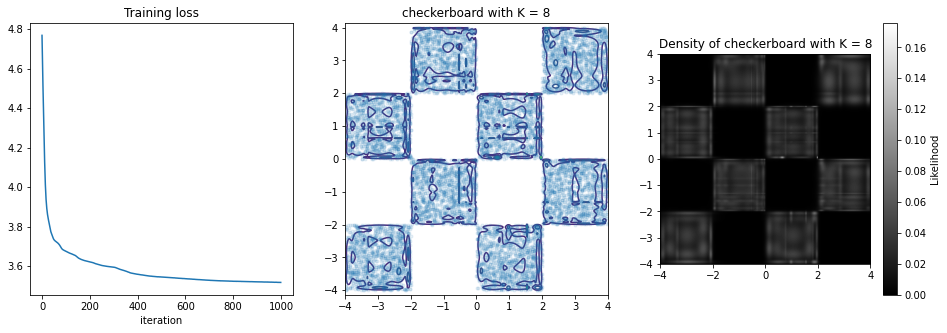

Density integrates to 1.0
It should be = 1.0


In [9]:
import utils as utl

f,ax = plt.subplots(1, 3, figsize=(16,5))
ax[0].plot(range(len(losses)), np.array(losses))
ax[0].set_title('Training loss')
ax[0].set_xlabel('iteration')
utl.plot_contours(ax[1], data, model, alpha=0.1)
ax[1].set_title(name+' with K = '+str(K))
utl.plot_density(ax[2], model)
ax[2].set_title('Density of ' + name + ' with K = ' + str(K))
plt.show()

integrand = utl.unitTest(model, limits=[-6, 6])
print(f'Density integrates to {round(integrand, 4)}')
print('It should be = 1.0')